In [29]:
print("Greedy Algorithm:")
N=5000#总实验1数
import random
import numpy as np
epsilo=0.1###########################在此修改偏好系数######################
count=[0,0,0]#每个老虎机的计数
list3=[0.0,0.0,0.0]#每个老虎机的概率
prob=np.array(list3)
realprob=[0.7,0.5,0.4]#真实概率
R=0 #总收益
for i in range(N):
    r=0#这是用来判断这次实验是否成功的变量
    ran=random.uniform(0,1)#用于模拟epsilo概率
    if(ran<epsilo):#探索过程
        a=random.randint(0,2)#用于模拟随机三选一
        ran_2=random.uniform(0,1)#用于模拟是否选择
        if(ran_2<realprob[a]):
            r=1
            R+=1
        count[a]+=1
        prob[a]=prob[a]+(r-prob[a])/count[a]
    else:
        index=np.argmax(prob)
        count[index]+=1
        ran_3=random.uniform(0,1)
        if(ran_3<realprob[index]):
            r=1
            R+=1
        prob[index]=prob[index]+(r-prob[index])/count[index]
print("分别成功的概率是",count)
print("三个老虎机分别的概率是",prob)
print("最终成功的总数是",R)
        
            
        
        

Greedy Algorithm:
分别成功的概率是 [4347, 344, 309]
三个老虎机分别的概率是 [0.71175523 0.49418605 0.39805825]
最终成功的总数是 3387


In [5]:
print("UCB Algorithm")
N=5000#总实验1数
import random
import numpy as np
import math
c=1###############在此修改c值##################
count=[1,1,1]#每个老虎机的计数
list3=[0.0,0.0,0.0]#每个老虎机的概率
list4=[0.0,0.0,0.0]
prob=np.array(list3)
prob_2=np.array(list4)
realprob=[0.7,0.5,0.4]#真实概率
R=0 #总收益
for i in range(3):
    rand_1=random.uniform(0,1)
    if(rand_1<realprob[i]):
        prob[i]=1
for i in range(4,N):
    r=0
    for j in range(3):
        prob_2[j]=prob[j]+c*math.sqrt((2*math.log10(i))/count[j])
    index=np.argmax(prob_2)
    count[index]+=1
    rand_2=random.uniform(0,1)
    if(rand_2<realprob[index]):
        r=1
        R+=1  
    prob[index]=prob[index]+(r-prob[index])/count[index]
print("分别成功的概率是",count)
print("三个老虎机分别的概率是",prob)
print("最终成功的总数是",R)

UCB Algorithm
分别成功的概率是 [4831, 69, 99]
三个老虎机分别的概率是 [0.7000621  0.4057971  0.46464646]
最终成功的总数是 3454


In [26]:
print("TS Algorithm")
N=5000#总实验1数
import random
import numpy as np
import math
###############在此修改beta参量##################
static=[[1,1],[1,1],[1,1]]
list3=[0.0,0.0,0.0]#每个老虎机的概率
prob=np.array(list3)
realprob=[0.7,0.5,0.4]#真实概率
R=0 #总收益
for i in range(N):
    for j in range(3):
        prob[j]=random.betavariate(static[j][0],static[j][1])
    #print(prob)
    index =np.argmax(prob)
    rand_1=random.uniform(0,1)
    if(rand_1<realprob[index]):
        static[index][0]+=1
        R+=1
    else:
        static[index][1]+=1
    #print(static)
print(static[0][0]/(static[0][0]+static[0][1]),static[1][0]/(static[1][0]+static[1][1]),static[2][0]/(static[2][0]+static[2][1]))
print("最终成功的总数是",R)

TS Algorithm
0.7132754091735705 0.41379310344827586 0.42857142857142855
最终成功的总数是 3551


The compare among three algorithm


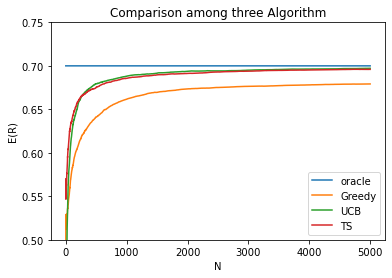

Greedy 0.679187 epsilon=0.05
UCB 0.697185 c=0.3
TS 0.695967 a1,a2,a3,b1,b2,b3=1


In [25]:
print("The compare among three algorithm")
N=5000#总实验1数
import random
import matplotlib.pyplot as plt
import numpy as np
import math
epsilo=0.1###########################在此修改偏好系数######################
R_G=[0 for i in range(N)]
R_U=[0 for i in range(N)]
R_T=[0 for i in range(N)]


for q in range(200):
    ###########################Greedy######################
    count=[0,0,0]#每个老虎机的计数
    list3=[0.0,0.0,0.0]#每个老虎机的概率
    prob=np.array(list3)
    realprob=[0.5,0.7,0.4]#真实概率(由于python内置函数问题修改了一下概率顺序)
    R=0 #总收益
    for i in range(N):
        r=0#这是用来判断这次实验是否成功的变量
        ran=random.uniform(0,1)#用于模拟epsilo概率
        if(ran<epsilo):#探索过程
            a=random.randint(0,2)#用于模拟随机三选一
            ran_2=random.uniform(0,1)#用于模拟是否选择
            if(ran_2<realprob[a]):
                r=1
                R+=1
            count[a]+=1
            prob[a]=prob[a]+(r-prob[a])/count[a]
        else:
            index=np.argmax(prob)
            count[index]+=1
            ran_3=random.uniform(0,1)
            if(ran_3<realprob[index]):
                r=1
                R+=1
            prob[index]=prob[index]+(r-prob[index])/count[index]
        R_G[i]+=R
        
    ###########################UCB######################
    
    c=0.3###############在此修改c值##################
    count_2=[1,1,1]#每个老虎机的计数
    list3=[0.0,0.0,0.0]#每个老虎机的概率
    list4=[0.0,0.0,0.0]
    prob_12=np.array(list3)
    prob_2=np.array(list4)
    R_2=0 #总收益
    for i in range(3):
        rand_1=random.uniform(0,1)
        if(rand_1<realprob[i]):
            prob_12[i]=1
    for i in range(4,N):
        r=0
        for j in range(3):
            prob_2[j]=prob_12[j]+c*math.sqrt((2*math.log(i))/count_2[j])
        index=np.argmax(prob_2)
        count_2[index]+=1
        rand_2=random.uniform(0,1)
        if(rand_2<realprob[index]):
            r=1
            R_2+=1  
        prob_12[index]=prob_12[index]+(r-prob_12[index])/count_2[index]
        R_U[i]+=R_2
    
    ###########################Thompsom Sampling######################   
    static=[[1,1],[1,1],[1,1]]
    list3_3=[0.0,0.0,0.0]#每个老虎机的概率
    prob_3=np.array(list3_3)
    R_3=0 #总收益
    for p in range(N):
        for j in range(3):
            prob_3[j]=random.betavariate(static[j][0],static[j][1])
        #print(prob)
        index =np.argmax(prob_3)
        rand_1=random.uniform(0,1)
        if(rand_1<realprob[index]):
            static[index][0]+=1
            R_3+=1
        else:
            static[index][1]+=1
        R_T[p]+=R_3
    
for i in range(N):
    R_G[i]=R_G[i]/((i+1)*200)
    R_T[i]=R_T[i]/((i+1)*200)
    R_U[i]=R_U[i]/((i+1)*200)
x=[i for i in range(N)]
y=[0.7 for i in range(N)]
plt.figure()
plt.title("Comparison among three Algorithm")
plt.plot(x,y,label="oracle")
plt.plot(x,R_G,label="Greedy")
plt.plot(x,R_U,label="UCB")
plt.plot(x,R_T,label="TS")
plt.legend()
plt.xlabel("N")
plt.ylabel("E(R)")
plt.ylim(0.5, 0.75)
fig=plt.gcf()
fig.savefig('./666.pdf')
plt.show()
print("Greedy",R_G[4999],"epsilon=0.05")
print("UCB",R_U[4999],"c=0.3")
print("TS",R_T[4999],"a1,a2,a3,b1,b2,b3=1")

            
        
        

In [11]:
print("Results of 200 independent trials")
N=5000#总实验1数
import random
import matplotlib.pyplot as plt
import numpy as np
import math
epsilo=0.1###########################在此修改偏好系数######################
R_G=[0 for i in range(N)]
for q in range(200):
    ###########################Greedy######################
    count=[0,0,0]#每个老虎机的计数
    list3=[0.0,0.0,0.0]#每个老虎机的概率
    prob=np.array(list3)
    realprob=[0.7,0.5,0.4]#真实概率
    R=0 #总收益
    for i in range(N):
        r=0#这是用来判断这次实验是否成功的变量
        ran=random.uniform(0,1)#用于模拟epsilo概率
        if(ran<epsilo):#探索过程
            a=random.randint(0,2)#用于模拟随机三选一
            ran_2=random.uniform(0,1)#用于模拟是否选择
            if(ran_2<realprob[a]):
                r=1
                R+=1
            count[a]+=1
            prob[a]=prob[a]+(r-prob[a])/count[a]
        else:
            index=np.argmax(prob)
            count[index]+=1
            ran_3=random.uniform(0,1)
            if(ran_3<realprob[index]):
                r=1
                R+=1
            prob[index]=prob[index]+(r-prob[index])/count[index]
        R_G[i]+=R
R_G[i]=R_G[i]/(200)
print("Greedy",R_G[4999],"epsilon=0.1")

epsilo=0.5###########################在此修改偏好系数######################
R_G=[0 for i in range(N)]
for q in range(200):
    ###########################Greedy######################
    count=[0,0,0]#每个老虎机的计数
    list3=[0.0,0.0,0.0]#每个老虎机的概率
    prob=np.array(list3)
    realprob=[0.7,0.5,0.4]#真实概率
    R=0 #总收益
    for i in range(N):
        r=0#这是用来判断这次实验是否成功的变量
        ran=random.uniform(0,1)#用于模拟epsilo概率
        if(ran<epsilo):#探索过程
            a=random.randint(0,2)#用于模拟随机三选一
            ran_2=random.uniform(0,1)#用于模拟是否选择
            if(ran_2<realprob[a]):
                r=1
                R+=1
            count[a]+=1
            prob[a]=prob[a]+(r-prob[a])/count[a]
        else:
            index=np.argmax(prob)
            count[index]+=1
            ran_3=random.uniform(0,1)
            if(ran_3<realprob[index]):
                r=1
                R+=1
            prob[index]=prob[index]+(r-prob[index])/count[index]
        R_G[i]+=R
R_G[i]=R_G[i]/(200)
print("Greedy",R_G[4999],"epsilon=0.5")
epsilo=0.9###########################在此修改偏好系数######################
R_G=[0 for i in range(N)]
for q in range(200):
    ###########################Greedy######################
    count=[0,0,0]#每个老虎机的计数
    list3=[0.0,0.0,0.0]#每个老虎机的概率
    prob=np.array(list3)
    realprob=[0.7,0.5,0.4]#真实概率
    R=0 #总收益
    for i in range(N):
        r=0#这是用来判断这次实验是否成功的变量
        ran=random.uniform(0,1)#用于模拟epsilo概率
        if(ran<epsilo):#探索过程
            a=random.randint(0,2)#用于模拟随机三选一
            ran_2=random.uniform(0,1)#用于模拟是否选择
            if(ran_2<realprob[a]):
                r=1
                R+=1
            count[a]+=1
            prob[a]=prob[a]+(r-prob[a])/count[a]
        else:
            index=np.argmax(prob)
            count[index]+=1
            ran_3=random.uniform(0,1)
            if(ran_3<realprob[index]):
                r=1
                R+=1
            prob[index]=prob[index]+(r-prob[index])/count[index]
        R_G[i]+=R
R_G[i]=R_G[i]/(200)
print("Greedy",R_G[4999],"epsilon=0.9")

R_U=[0 for i in range(N)]
c=1###############在此修改c值##################
for q in range(200):
    count_2=[1,1,1]#每个老虎机的计数
    list3=[0.0,0.0,0.0]#每个老虎机的概率
    list4=[0.0,0.0,0.0]
    prob_12=np.array(list3)
    prob_2=np.array(list4)
    R_2=0 #总收益
    for i in range(3):
        rand_1=random.uniform(0,1)
        if(rand_1<realprob[i]):
            prob_12[i]=1
    for i in range(4,N):
        r=0
        for j in range(3):
            prob_2[j]=prob_12[j]+c*math.sqrt((2*math.log(i))/count_2[j])
        index=np.argmax(prob_2)
        count_2[index]+=1
        rand_2=random.uniform(0,1)
        if(rand_2<realprob[index]):
            r=1
            R_2+=1  
        prob_12[index]=prob_12[index]+(r-prob_12[index])/count_2[index]
        R_U[i]+=R_2
R_U[i]=R_U[i]/(200)
print("UCB",R_U[4999],"c=1")
R_U=[0 for i in range(N)]
c=5###############在此修改c值##################
for q in range(200):
    count_2=[1,1,1]#每个老虎机的计数
    list3=[0.0,0.0,0.0]#每个老虎机的概率
    list4=[0.0,0.0,0.0]
    prob_12=np.array(list3)
    prob_2=np.array(list4)
    R_2=0 #总收益
    for i in range(3):
        rand_1=random.uniform(0,1)
        if(rand_1<realprob[i]):
            prob_12[i]=1
    for i in range(4,N):
        r=0
        for j in range(3):
            prob_2[j]=prob_12[j]+c*math.sqrt((2*math.log(i))/count_2[j])
        index=np.argmax(prob_2)
        count_2[index]+=1
        rand_2=random.uniform(0,1)
        if(rand_2<realprob[index]):
            r=1
            R_2+=1  
        prob_12[index]=prob_12[index]+(r-prob_12[index])/count_2[index]
        R_U[i]+=R_2
R_U[i]=R_U[i]/(200)
print("UCB",R_U[4999],"c=5")
R_U=[0 for i in range(N)]
c=10###############在此修改c值##################
for q in range(200):
    count_2=[1,1,1]#每个老虎机的计数
    list3=[0.0,0.0,0.0]#每个老虎机的概率
    list4=[0.0,0.0,0.0]
    prob_12=np.array(list3)
    prob_2=np.array(list4)
    R_2=0 #总收益
    for i in range(3):
        rand_1=random.uniform(0,1)
        if(rand_1<realprob[i]):
            prob_12[i]=1
    for i in range(4,N):
        r=0
        for j in range(3):
            prob_2[j]=prob_12[j]+c*math.sqrt((2*math.log(i))/count_2[j])
        index=np.argmax(prob_2)
        count_2[index]+=1
        rand_2=random.uniform(0,1)
        if(rand_2<realprob[index]):
            r=1
            R_2+=1  
        prob_12[index]=prob_12[index]+(r-prob_12[index])/count_2[index]
        R_U[i]+=R_2
R_U[i]=R_U[i]/(200)
print("UCB",R_U[4999],"c=10")

###########################Thompsom Sampling######################  
R_T=[0 for i in range(N)]
for q in range(200):

    static=[[1,1],[1,1],[1,1]]
    list3_3=[0.0,0.0,0.0]#每个老虎机的概率
    prob_3=np.array(list3_3)
    R_3=0 #总收益
    for p in range(N):
        for j in range(3):
            prob_3[j]=random.betavariate(static[j][0],static[j][1])
        #print(prob)
        index =np.argmax(prob_3)
        rand_1=random.uniform(0,1)
        if(rand_1<realprob[index]):
            static[index][0]+=1
            R_3+=1
        else:
            static[index][1]+=1
        R_T[p]+=R_3
R_T[i]=R_T[i]/(200)
print("TS",R_T[4999],"a1,a2,a3,b1,b2,b3=1")

R_T=[0 for i in range(N)]
for q in range(200):
    static=[[601,401],[401,601],[2,3]]
    list3_3=[0.0,0.0,0.0]#每个老虎机的概率
    prob_3=np.array(list3_3)
    R_3=0 #总收益
    for p in range(N):
        for j in range(3):
            prob_3[j]=random.betavariate(static[j][0],static[j][1])
        #print(prob)
        index =np.argmax(prob_3)
        rand_1=random.uniform(0,1)
        if(rand_1<realprob[index]):
            static[index][0]+=1
            R_3+=1
        else:
            static[index][1]+=1
        R_T[p]+=R_3
R_T[i]=R_T[i]/(200)
print("TS",R_T[4999],"a1=601,a2=401,a3=2,b1=401,b2=601,b3=3")

Results of 200 independent trials
Greedy 3411.695 epsilon=0.1
Greedy 3084.085 epsilon=0.5
Greedy 2744.025 epsilon=0.9
UCB 3409.815 c=1
UCB 2978.295 c=5
UCB 2826.165 c=10
TS 3484.48 a1,a2,a3,b1,b2,b3=1
TS 3494.445 a1=601,a2=401,a3=2,b1=401,b2=601,b3=3


The compare among three algorithm of regret function


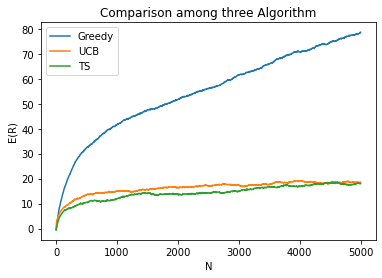

Greedy 78.57999999999993 epsilon=0.05
UCB 18.5649999999996 c=0.3
TS 18.004999999999654 a1,a2,a3,b1,b2,b3=1


In [9]:
print("The compare among three algorithm of regret function")
N=5000#总实验1数
import random
import matplotlib.pyplot as plt
import numpy as np
import math
epsilo=0.05###########################在此修改偏好系数######################
R_G=[0 for i in range(N)]
R_U=[0 for i in range(N)]
R_T=[0 for i in range(N)]


for q in range(200):
    ###########################Greedy######################
    count=[0,0,0]#每个老虎机的计数
    list3=[0.0,0.0,0.0]#每个老虎机的概率
    prob=np.array(list3)
    realprob=[0.5,0.7,0.4]#真实概率
    R=0 #总收益
    for i in range(N):
        r=0#这是用来判断这次实验是否成功的变量
        ran=random.uniform(0,1)#用于模拟epsilo概率
        if(ran<epsilo):#探索过程
            a=random.randint(0,2)#用于模拟随机三选一
            ran_2=random.uniform(0,1)#用于模拟是否选择
            if(ran_2<realprob[a]):
                r=1
                R+=1
            count[a]+=1
            prob[a]=prob[a]+(r-prob[a])/count[a]
        else:
            index=np.argmax(prob)
            count[index]+=1
            ran_3=random.uniform(0,1)
            if(ran_3<realprob[index]):
                r=1
                R+=1
            prob[index]=prob[index]+(r-prob[index])/count[index]
        R_G[i]+=R
        
    ###########################UCB######################
    
    c=0.3###############在此修改c值##################
    count_2=[1,1,1]#每个老虎机的计数
    list3=[0.0,0.0,0.0]#每个老虎机的概率
    list4=[0.0,0.0,0.0]
    prob_12=np.array(list3)
    prob_2=np.array(list4)
    R_2=0 #总收益
    for i in range(3):
        rand_1=random.uniform(0,1)
        if(rand_1<realprob[i]):
            prob_12[i]=1
    for i in range(4,N):
        r=0
        for j in range(3):
            prob_2[j]=prob_12[j]+c*math.sqrt((2*math.log(i))/count_2[j])
        index=np.argmax(prob_2)
        count_2[index]+=1
        rand_2=random.uniform(0,1)
        if(rand_2<realprob[index]):
            r=1
            R_2+=1  
        prob_12[index]=prob_12[index]+(r-prob_12[index])/count_2[index]
        R_U[i]+=R_2
    
    ###########################Thompsom Sampling######################   
    static=[[1,1],[1,1],[1,1]]
    list3_3=[0.0,0.0,0.0]#每个老虎机的概率
    prob_3=np.array(list3_3)
    R_3=0 #总收益
    for p in range(N):
        for j in range(3):
            prob_3[j]=random.betavariate(static[j][0],static[j][1])
        #print(prob)
        index =np.argmax(prob_3)
        rand_1=random.uniform(0,1)
        if(rand_1<realprob[index]):
            static[index][0]+=1
            R_3+=1
        else:
            static[index][1]+=1
        R_T[p]+=R_3
    
for i in range(N):
    R_G[i]=0.7*i-R_G[i]/(200)
    R_T[i]=0.7*i-R_T[i]/(200)
    R_U[i]=0.7*i-R_U[i]/(200)
x=[i for i in range(N)]
y=[0.7*i for i in range(N)]
plt.figure()
plt.title("Comparison among three Algorithm")
#plt.plot(x,y,label="oracle")
plt.plot(x,R_G,label="Greedy")
plt.plot(x,R_U,label="UCB")
plt.plot(x,R_T,label="TS")
plt.legend()
plt.xlabel("N")
plt.ylabel("E(R)")
fig=plt.gcf()
fig.savefig('./666.pdf')
#plt.ylim(0.5, 0.75)
plt.show()
print("Greedy",R_G[4999],"epsilon=0.05")
print("UCB",R_U[4999],"c=0.3")
print("TS",R_T[4999],"a1,a2,a3,b1,b2,b3=1")
import matplotlib.pyplot as plt



Greedy Algorithm:


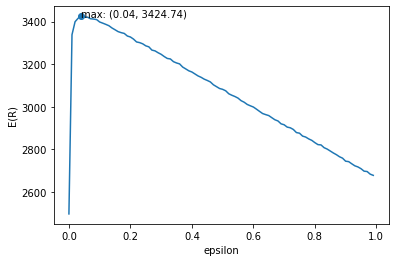

In [18]:
print("Greedy Algorithm:")
N=5000#总实验1数
import random
import matplotlib.pyplot as plt
import numpy as np
R=0 #总收益
n=100
epsilon=[0.01*i for i in range(n)]
R=[0 for i in range(n)]
for k in range(0,n):
    for j in range(200):
        epsilo=epsilon[k]###########################在此修改偏好系数######################
        count=[0,0,0]#每个老虎机的计数
        list3=[0.0,0.0,0.0]#每个老虎机的概率
        prob=np.array(list3)
        realprob=[0.5,0.7,0.4]#真实概率
        for i in range(N):
            r=0#这是用来判断这次实验是否成功的变量
            ran=random.uniform(0,1)#用于模拟epsilo概率
            if(ran<epsilo):#探索过程
                a=random.randint(0,2)#用于模拟随机三选一
                ran_2=random.uniform(0,1)#用于模拟是否选择
                if(ran_2<realprob[a]):
                    r=1
                    R[k]+=1
                count[a]+=1
                prob[a]=prob[a]+(r-prob[a])/count[a]
            else:
                index=np.argmax(prob)
                count[index]+=1
                ran_3=random.uniform(0,1)
                if(ran_3<realprob[index]):
                    r=1
                    R[k]+=1
                prob[index]=prob[index]+(r-prob[index])/count[index]
R=[i/200 for i in R]
#print("最终成功的总数是",R)
plt.figure()
plt.plot(epsilon,R)
max_index=np.argmax(R)
plt.xlabel("epsilon")
plt.ylabel("E(R)")
plt.scatter(epsilon[max_index], R[max_index])
plt.text(epsilon[max_index], R[max_index], 'max: ({:.2f}, {:.2f})'.format(epsilon[max_index], R[max_index]))
fig=plt.gcf()
fig.savefig('./666.pdf')
plt.show()
        
            
        
        

UCB Algorithm


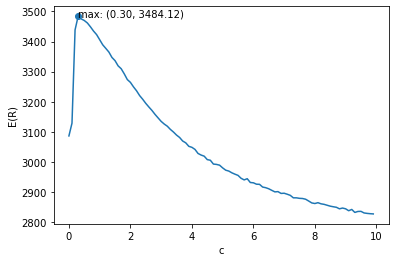

In [19]:
print("UCB Algorithm")
N=5000#总实验1数
import random
import numpy as np
import matplotlib.pyplot as plt
import math
###############在此修改c值##################
n=100
realprob=[0.5,0.7,0.4]#真实概率
c=[i*0.1 for i in range(n)]
R=[0 for i in range(n)]
for k in range(0,n):
    for w in range(200):
        count=[1,1,1]#每个老虎机的计数
        list3=[0.0,0.0,0.0]#每个老虎机的概率
        list4=[0.0,0.0,0.0]
        prob=np.array(list3)
        prob_2=np.array(list4)
        for i in range(3):
            rand_1=random.uniform(0,1)
            if(rand_1<realprob[i]):
                prob[i]=1
        for i in range(4,N):
            r=0
            for j in range(3):
                prob_2[j]=prob[j]+c[k]*math.sqrt((2*math.log(i))/count[j])
            index=np.argmax(prob_2)
            count[index]+=1
            rand_2=random.uniform(0,1)
            if(rand_2<realprob[index]):
                r=1
                R[k]+=1  
            prob[index]=prob[index]+(r-prob[index])/count[index]
R=[i/200 for i in R]
plt.figure()
plt.plot(c,R)
max_index=np.argmax(R)
plt.xlabel("c")
plt.ylabel("E(R)")
plt.scatter(c[max_index], R[max_index])
plt.text(c[max_index], R[max_index], 'max: ({:.2f}, {:.2f})'.format(c[max_index], R[max_index]))
fig=plt.gcf()
fig.savefig('./666.pdf')
plt.show()

Simulation


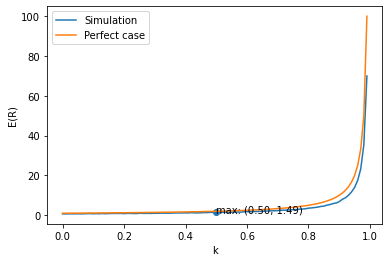

E(R) is  1.4900820289763488  when k=0.5


In [34]:
print("Simulation")
N=5000#总实验1数
import matplotlib.pyplot as plt
import random
import numpy as np
import math
n=100
k_array=[0.01*i for i in range(n)]
Sum_array=[0 for i in range(n)]
###############在此修改beta参量##################
for q in range(n):
    k=k_array[q]
    Sum=0
    for i in range(100):
        static=[[601,401],[401,601]]
        list3=[0.0,0.0]#每个老虎机的概率
        prob=np.array(list3)
        realprob=[0.7,0.5]#真实概率
        R=0 #总收益
        for i in range(N):
            for j in range(2):
                prob[j]=random.betavariate(static[j][0],static[j][1])
            #print(prob)
            index =np.argmax(prob)
            rand_1=random.uniform(0,1)
            if(rand_1<realprob[index]):
                static[index][0]+=1
                R+=k**i
            else:
                static[index][1]+=1
            #print(static)
        Sum+=R
    Sum=Sum/100
    Sum_array[q]=Sum
plt.figure()
perfect=[1/(1-i/100) for i in range(100)]
plt.plot(k_array,Sum_array,label="Simulation")
plt.plot(k_array,perfect,label="Perfect case")
plt.legend()
max_index=50
plt.xlabel("k")
plt.ylabel("E(R)")
plt.scatter(k_array[max_index], Sum_array[max_index])
plt.text(k_array[max_index],Sum_array[max_index], 'max: ({:.2f}, {:.2f})'.format(k_array[max_index], Sum_array[max_index]))
fig=plt.gcf()
fig.savefig('./666.pdf')
plt.show()
print("E(R) is ",Sum_array[50]," when k=0.5")

In [7]:
print("UCB Algorithm")
N=5000#总实验1数
import random
import numpy as np
import math
c=0.3###############在此修改c值##################
k=0.5
Sum=0
for i in range(100):
    count=[1,1]#每个老虎机的计数
    list3=[0.0,0.0]#每个老虎机的概率
    list4=[0.0,0.0]
    prob=np.array(list3)
    prob_2=np.array(list4)
    realprob=[0.7,0.5]#真实概率
    R=0 #总收益
    for i in range(2):
        rand_1=random.uniform(0,1)
        if(rand_1<realprob[i]):
            prob[i]=1
            R+=k**i
    for i in range(3,N):
        r=0
        for j in range(2):
            prob_2[j]=prob[j]+c*math.sqrt((2*math.log10(i))/count[j])
        index=np.argmax(prob_2)
        count[index]+=1
        rand_2=random.uniform(0,1)
        if(rand_2<realprob[index]):
            r=1
            R+=k**i
        prob[index]=prob[index]+(r-prob[index])/count[index]
    Sum+=R
Sum=Sum/100
print(Sum)
# print("分别成功的概率是",count)
# print("三个老虎机分别的概率是",prob)
# print("最终成功的总数是",R)

UCB Algorithm
1.0765232035933654


In [9]:
print("Greedy Algorithm:")
N=5000#总实验1数
import random
import numpy as np
epsilo=0.1###########################在此修改偏好系数######################
k=0.1
Sum_Greedy=0
Sum_Ts=0
for j in range(1000):
    count=[0,0]#每个老虎机的计数
    list3=[0.0,0.0]#每个老虎机的概率
    prob=np.array(list3)
    realprob=[0.5,0.7]#真实概率
    R=0 #总收益
    for i in range(N):
        epsilo=0.1**N
        r=0#这是用来判断这次实验是否成功的变量
        ran=random.uniform(0,1)#用于模拟epsilo概率
        if(ran<epsilo):#探索过程
            a=random.randint(0,1)#用于模拟随机三选一
            ran_2=random.uniform(0,1)#用于模拟是否选择
            if(ran_2<realprob[a]):
                r=1
                R+=k**i
            count[a]+=1
            prob[a]=prob[a]+(r-prob[a])/count[a]
        else:
            if(prob[0]==prob[1]):
                index=random.randint(0,1)
            else:
                index=np.argmax(prob)
            count[index]+=1
            ran_3=random.uniform(0,1)
            if(ran_3<realprob[index]):
                r=1
                R+=k**i
            prob[index]=prob[index]+(r-prob[index])/count[index]   
    Sum_Greedy+=R
Sum_Greedy=Sum_Greedy/1000
print("E(R) is ",Sum_Greedy," when k=",k," and epsilon=0.1")
print("Ts:")
for q in range(1000):
    static=[[1,1],[1,1]]
    list3=[0.0,0.0]#每个老虎机的概率
    prob=np.array(list3)
    #realprob=[0.5,0.7]#真实概率
    R=0 #总收益
    for i in range(N):
        for j in range(2):
            prob[j]=random.betavariate(static[j][0],static[j][1])
        #print(prob)
        index =np.argmax(prob)
        rand_1=random.uniform(0,1)
        if(rand_1<realprob[index]):
            static[index][0]+=(1/k**2)
            R+=k**i
        else:
            static[index][1]+=(1/k**2)
        #print(static)
    Sum_Ts+=R
Sum_Ts=Sum_Ts/1000
print("E(R) is ",Sum_Ts," when k=",k,"when a1,b1,a2,b2=1")
# print("分别成功的概率是",count)
# print("三个老虎机分别的概率是",prob)
# print("最终成功的总数是",R)

Greedy Algorithm:
E(R) is  0.6663319855317559  when k= 0.1  and epsilon=0.1
Ts:
E(R) is  0.6912591626247317  when k= 0.1 when a1,b1,a2,b2=1


In [27]:
print("TS")
N=5#总实验1数
import matplotlib.pyplot as plt
import random
import numpy as np
import math
k=0.1
Sum=0
for i in range(100):
    static=[[1,1],[1,1]]
    list3=[0.0,0.0]#每个老虎机的概率
    prob=np.array(list3)
    realprob=[0.5,0.7]#真实概率
    R=0 #总收益
    for i in range(N):
        for j in range(2):
            prob[j]=random.betavariate(static[j][0],static[j][1])
        #print(prob)
        index =np.argmax(prob)
        rand_1=random.uniform(0,1)
        if(rand_1<realprob[index]):
            static[index][0]+=1
            R+=k**i
        else:
            static[index][1]+=1
        #print(static)
    Sum+=R
Sum=Sum/100
print("E(R) is ",Sum," when k=",k," and epsilon=0.1")
# print("分别成功的概率是",count)
# print("三个老虎机分别的概率是",prob)
# print("最终成功的总数是",R)

TS
E(R) is  0.654682  when k= 0.1  and epsilon=0.1


In [17]:
import numpy as np
limit=100
data=np.zeros((limit+1,limit+1,limit+1,limit+1))
gamma=0.1

def TS_DP(a1,b1,a2,b2):
    global data
    global gamma
    if(data[a1][b1][a2][b2]!=0):
        return data[a1][b1][a2][b2]
    if((a1==limit or b1==limit)or(a2==limit or b2==limit)):
        a1=min(a1,limit)
        a2=min(a2,limit)
        b1=min(b1,limit)
        b2=min(b2,limit)
        data[a1][b1][a2][b2]=1/(1-gamma)*max(a1/(a1+b1),a2/(a2+b2))
        return data[a1][b1][a2][b2]
    else:
        R1=a1/(a1+b1)*(1+gamma*TS_DP(a1+1,b1,a2,b2))+b1/(a1+b1)*(gamma*TS_DP(a1,b1+1,a2,b2))
        R2=a2/(a2+b2)*(1+gamma*TS_DP(a1,b1,a2+1,b2))+b2/(a2+b2)*(gamma*TS_DP(a1,b1,a2,b2+1))
        data[a1][b1][a2][b2]=max(R1,R2)
        return data[a1][b1][a2][b2]
print(TS_DP(1,1,1,1))

0.5648457766812222


In [ ]:
print("TS")
N=50#总实验1数
import matplotlib.pyplot as plt
import random
import numpy as np
import math
k=0.1
Sum=0
limit=30
data=np.zeros((limit+10,limit+10,limit+10,limit+10))
gamma=0.1

def mydfs(a1,b1,a2,b2):
    global data
    global gamma

    if((a1>=limit-1 or b1>=limit-1)or(a2>=limit-1 or b2>=limit-1)):
        a1=min(a1,limit)
        b1=min(b1,limit)
        a2=min(a2,limit)
        b2=min(b2,limit)
        data[a1][b1][a2][b2]=1/(1-gamma)*max(a1/(a1+b1),a2/(a2+b2))
        return data[a1][b1][a2][b2]
    if(data[a1][b1][a2][b2]!=0):
        return data[a1][b1][a2][b2]
    else:
        R1=a1/(a1+b1)*(1+gamma*mydfs(a1+1,b1,a2,b2))+b1/(a1+b1)*(gamma*mydfs(a1,b1+1,a2,b2))
        R2=a2/(a2+b2)*(1+gamma*mydfs(a1,b1,a2+1,b2))+b2/(a2+b2)*(gamma*mydfs(a1,b1,a2,b2+1))
        data[a1][b1][a2][b2]=max(R1,R2)
        return data[a1][b1][a2][b2]
for i in range(100):
    static=[[1,1],[1,1]]
    list3=[0.0,0.0]#每个老虎机的概率
    prob=np.array(list3)
    realprob=[0.5,0.7]#真实概率
    R=0 #总收益
    data=np.zeros((limit+1,limit+1,limit+1,limit+1))
    for i in range(N):
        a1=static[0][0]
        b1=static[0][1]
        a2=static[1][0]
        b2=static[1][1]
        prob[0]=a1/(a1+b1)*(1+gamma*mydfs(a1+1,b1,a2,b2))+b1/(a1+b1)*(gamma*mydfs(a1,b1+1,a2,b2))
        prob[1]=a2/(a2+b2)*(1+gamma*mydfs(a1,b1,a2+1,b2))+b2/(a2+b2)*(gamma*mydfs(a1,b1,a2,b2+1))
        if(prob[0]==prob[1]):
            index=random.randint(0,1)
        else:
        #print(prob)
            index =np.argmax(prob)
        rand_1=random.uniform(0,1)
        if(rand_1<realprob[index]):
            static[index][0]+=1
            R+=k**i
        else:
            static[index][1]+=1
        #print(static)
    Sum+=R
Sum=Sum/100
print("E(R) is ",Sum," when k=",k," and epsilon=0.1")
# print("分别成功的概率是",count)
# print("三个老虎机分别的概率是",prob)
# print("最终成功的总数是",R)

TS
